[[21.93171219946131, 24.041630560342615, 61.5223536610881, 73.00684899377592, 62.369864518050704, 90.27181176868004, 72.94518489934754, 49.9799959983992, 10.198039027185569, 10.198039027185569], [21.93171219946131, 24.041630560342615, 61.5223536610881, 73.00684899377592, 62.369864518050704, 90.27181176868004, 72.94518489934754, 49.9799959983992, 10.198039027185569, 10.198039027185569], [21.93171219946131, 24.041630560342615, 61.5223536610881, 73.00684899377592, 62.369864518050704, 90.27181176868004, 72.94518489934754, 49.9799959983992, 10.198039027185569, 10.198039027185569], [21.93171219946131, 24.041630560342615, 61.5223536610881, 73.00684899377592, 62.369864518050704, 90.27181176868004, 72.94518489934754, 49.9799959983992, 10.198039027185569, 10.198039027185569], [21.93171219946131, 24.041630560342615, 61.5223536610881, 73.00684899377592, 62.369864518050704, 90.27181176868004, 72.94518489934754, 49.9799959983992, 10.198039027185569, 10.198039027185569], [21.93171219946131, 24.041630

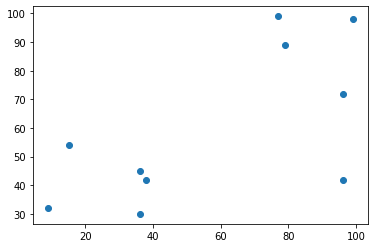

In [53]:
#k center problem with outliers
import numpy as np
import matplotlib.pyplot as plt
import math


class KCenterProblemWithOutliers():
  def __init__(self, x_input, y_input) -> None:
    self.x_input, self.y_input = x_input, y_input
    self.NUM_INPUTS = len(x_input)
    self.dists = [[0] * self.NUM_INPUTS] * self.NUM_INPUTS

  def compute_dists(self):
    for i in range(self.NUM_INPUTS):
      for j in range(self.NUM_INPUTS):
        if not i == j:
          self.dists[i][j] = math.sqrt((self.x_input[i]-self.x_input[j])**2 + (self.y_input[i]-self.y_input[j])**2)
    return self.dists

  def plot_points(self):
    plt.scatter(self.x_input, self.y_input)
    plt.show()

  def select_samples():
    return []

if __name__ == '__main__' :
  min_val, max_val, num_vals = 0, 100, 10

  x_input = np.random.randint(min_val, max_val, num_vals).tolist()
  y_input = np.random.randint(min_val, max_val, num_vals).tolist()

  query = KCenterProblemWithOutliers(x_input, y_input)
  query.plot_points()